In [6]:
from basic_tools import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7622)

# Parsing result of partitioned LDSC

In [3]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [4]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [5]:
idx=-1
h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/regression_result_list[idx]['category'].apply(category_to_format,args=('bp_range',))).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_df=h2_df.set_index(0)

found that variables 'gwas_result_sample','chr_bp_max' were not loaded. trying to load the variables
gwas_result_sample.shape: (13364303, 18)


In [17]:
def calculate_per_bp_var(regression_result_list_dict,suffix_list,mode='default'):
    var_list=[]
    for idx,value in enumerate(suffix_list):
        h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/regression_result_list[idx]['category'].apply(category_to_format,args=('bp_range',))).tolist() for phenotype,regression_result_list in regression_result_list_dict.items()])
        #h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/1).tolist() for phenotype,regression_result_list in regression_result_list_dict.items()])
        h2_df=h2_df.set_index(0)

        if mode=='default':
            values=h2_df.var(axis=1)
        elif mode=='mono':
            h2_mono=pd.Series(0.0,index=np.arange(h2_df.shape[1]));h2_mono[0]=1/category_to_format(list(regression_result_bp_list_dict.values())[0][idx]['category'].loc[0],'bp_range',)
            values=h2_df.var(axis=1)/h2_mono.var()
        elif mode=='max_and_poly':
            h2_mono=pd.Series(0.0,index=np.arange(h2_df.shape[1]));h2_mono[0]=1/category_to_format(list(regression_result_bp_list_dict.values())[0][idx]['category'].loc[0],'bp_range',)
            h2_poly=pd.Series(1.0,index=np.arange(h2_df.shape[1]));h2_poly=h2_poly/list(regression_result_bp_list_dict.values())[0][idx]['category'].apply(category_to_format,args=('bp_range',)).sum()
            #var_list.append(1-(h2_df.var(axis=1)-h2_poly.var())/(h2_df.var(axis=1).max()-h2_poly.var()))#-h2_df.mean(axis=1))
            values=(h2_df.var(axis=1)-0)/(h2_df.var(axis=1).max()-0)
        elif mode=='test':
            #values=-np.log10(h2_df.var(axis=1))
            #8.580318	
            #values=(values.max()-values)
            #values=1-values/values.max()
            values=-np.log10(h2_df.var(axis=1))
            values=(values-values.min())/(values.max()-values.min())
            #values=values-values.max()
            #values=values-values.max()
            #values=values
            #values=values-values.min()
            #values=1-(values-values.min())/(values.max()-values.min())
        else:
            raise
        var_list.append(values)
    var_df=pd.DataFrame(var_list,index=suffix_list)
    return var_df.T
per_bp_var=calculate_per_bp_var(regression_result_bp_list_dict,suffix_bp_list_power,mode='test')
per_bp_var.sort_values('bp8',ascending=False).head()

,bp300,bp128,bp64,bp32,bp16,bp8
0,,,,,,
6138_1,1.000000,0.904418,1.000000,1.000000,0.994747,1.000000
23115_irnt,0.870651,0.754938,0.863173,0.904541,0.980785,0.989840
23119_irnt,0.831725,0.777364,0.863113,0.901650,0.983032,0.982368
23104_irnt,0.824602,0.799314,0.894277,0.907363,0.991330,0.979249
2139_irnt,0.934867,0.763283,0.866681,0.891514,0.979229,0.978691


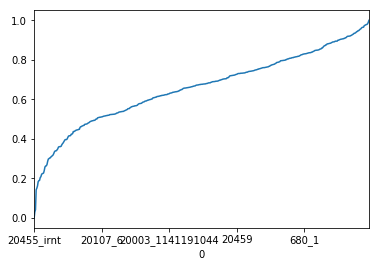

In [9]:
per_bp_var['bp8'].sort_values().plot()

In [12]:
h2_total['description']=h2_total.index.map(code_to_description)

In [139]:
var_and_h2=pd.concat([
    per_bp_var['bp8'],
    h2_total['uni.Total Observed scale h2'],
    h2_total['uni.Total Liability scale h2'],
    h2_total['uni.Total h2 p'],
    h2_total['description']
    ],axis=1)

In [138]:
plt.rcParams['font.family']='Arial'

https://matplotlib.org/users/annotations.html#annotating-with-text-with-box
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html

In [148]:
#var_and_h2['description']

In [150]:
var_and_h2_filtered[var_and_h2_filtered['description'].str.contains('strong')]

,bp8,uni.Total Observed scale h2,uni.Total Liability scale h2,uni.Total h2 p,description,x_data,y_data,hue_data,priority
5132_irnt,0.638276,0.2601,0.2601,1.332958e-38,3mm strong meridian (right),-0.584860,0.638276,37.875183,1
5104_irnt,0.621214,0.0483,0.0483,1.279813e-12,3mm strong meridian angle (left),-1.316053,0.621214,11.892854,0
5105_irnt,0.549160,0.0445,0.0445,2.866516e-07,6mm strong meridian angle (left),-1.351640,0.549160,6.542646,0
5106_irnt,0.553548,0.0429,0.0429,7.598821e-10,6mm strong meridian angle (right),-1.367543,0.553548,9.119254,0
5107_irnt,0.518230,0.0357,0.0357,3.749793e-10,3mm strong meridian angle (right),-1.447332,0.518230,9.425993,0


In [74]:
var_and_h2_filtered[var_and_h2_filtered['priority']==1].index.map(code_to_description)

Index(['Mean platelet (thrombocyte) volume', '3mm strong meridian (right)',
       'Body mass index (BMI)', 'Leg fat percentage (left)', 'Monocyte count'],
      dtype='object')

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

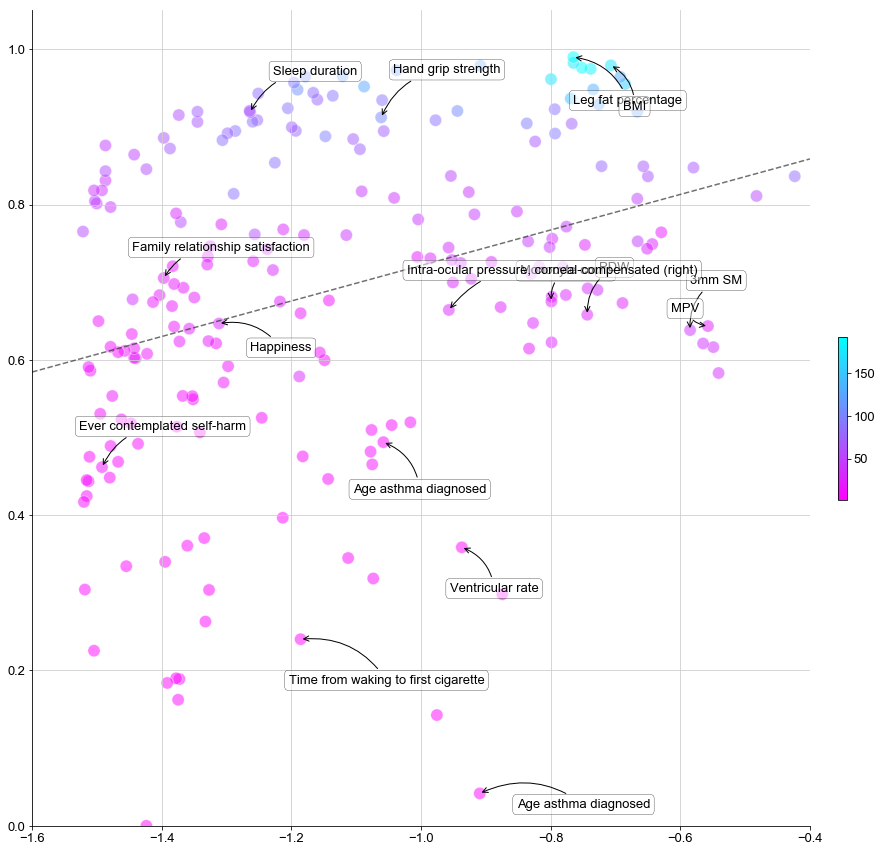

In [147]:
#phenotypes_par_filtered_description_dict=pd.read_csv(phenotypes_par_filtered_description_dict_path,sep='\t',index_col='description')
from numpy.polynomial.polynomial import polyfit

plt.rcParams["figure.figsize"] = (17,15)
plt.rcParams['font.size']=13


#h2bin_data_toplot=h2bin_data[np.logical_and.reduce([h2bin_data['h2_liability']==h2bin_data['h2_observed'],h2bin_data['h2_liability']>0.15,h2bin_data['h2_liability']<0.3])]
var_and_h2_filtered=var_and_h2[var_and_h2['uni.Total Liability scale h2']==var_and_h2['uni.Total Observed scale h2']]

#var_and_h2_filtered=var_and_h2.copy()

var_and_h2_filtered['x_data']=np.log10(var_and_h2_filtered['uni.Total Observed scale h2'])
var_and_h2_filtered['y_data']=var_and_h2_filtered['bp8']
var_and_h2_filtered['hue_data']=-np.log10(var_and_h2_filtered['uni.Total h2 p'])
#np.log10(st.norm.sf(h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total[idx]['{}.Total Observed scale h2_se'.format(suffix)]))



points = plt.scatter(var_and_h2_filtered['x_data'],
                     var_and_h2_filtered['y_data'],
                     c=var_and_h2_filtered["hue_data"],
                     cmap="cool_r")
plt.clf()
plt.colorbar(points,orientation="vertical",pad=0.03,shrink=0.2)#,panchor=(-1,-1))

plot=sns.scatterplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],hue=var_and_h2_filtered['hue_data'],palette="cool_r",
                    legend=None,alpha=0.5,s=150
                    )
#sns.regplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],marker='')
x,y=var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data']
b, m = polyfit(x, y, 1)

#plt.plot(x, y, '.')
#plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '-',c=(0.2,0.2,0.2,0.7))
plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '--',c=(0.2,0.2,0.2,0.7))


dup_sort=lambda x: sorted(np.append(x,-x),key=lambda y: abs(y))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(0.06,0.08,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/4]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]


text_plotted=pd.DataFrame([])

var_and_h2_filtered['priority']=0
var_and_h2_filtered['priority']['23115_irnt']=1
var_and_h2_filtered['priority']['30100_irnt']=1
var_and_h2_filtered['priority']['30110_irnt']=1
var_and_h2_filtered['priority']['23104_irnt']=1
var_and_h2_filtered['priority']['30130_irnt']=1
var_and_h2_filtered['priority']['23104_irnt']=1
var_and_h2_filtered['priority']['5132_irnt']=1


for idx,row in var_and_h2_filtered.sort_values('y_data',ascending=False).sort_values('priority',ascending=False).iterrows():
    description_short=description_to_short(row['description'],'abbr_pub')
    if type(description_short)==float:
        continue
    #plt.text(row['x_data'], row['y_data'], description_to_short(row['description'],'abbr_pub'))#, horizontalalignment='left', size='medium', color='black',)
    s=description_short
    xy=np.array([row['x_data'], row['y_data']])
    #np.random.shuffle(move_sample)
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    
    for move in move_sample:
        xytext=xy+move
        #print(idx,xy)
        #(((text_dup[0]-row['h2_liability'])**2+(5*(text_dup[1]-row['cm8']))**2)<0.0007).sum()==0:
        if  row['priority']==1 or text_plotted.shape[0]==0 or ((((text_plotted['x']-xytext[0])**2+0.5*(text_plotted['y']-xytext[1])**2)<0.03).sum()==0 and xytext[1]<1.05 and xytext[1]>0.02):
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            #print(description_short,xy,move,xytext)
            break

            
plt.grid(color=(0.8,0.8,0.8,0.1))
#plt.grid()
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.xlim(-1.6,-0.4)
plt.ylim(0,1.05)

sns.despine()

plt.show()

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

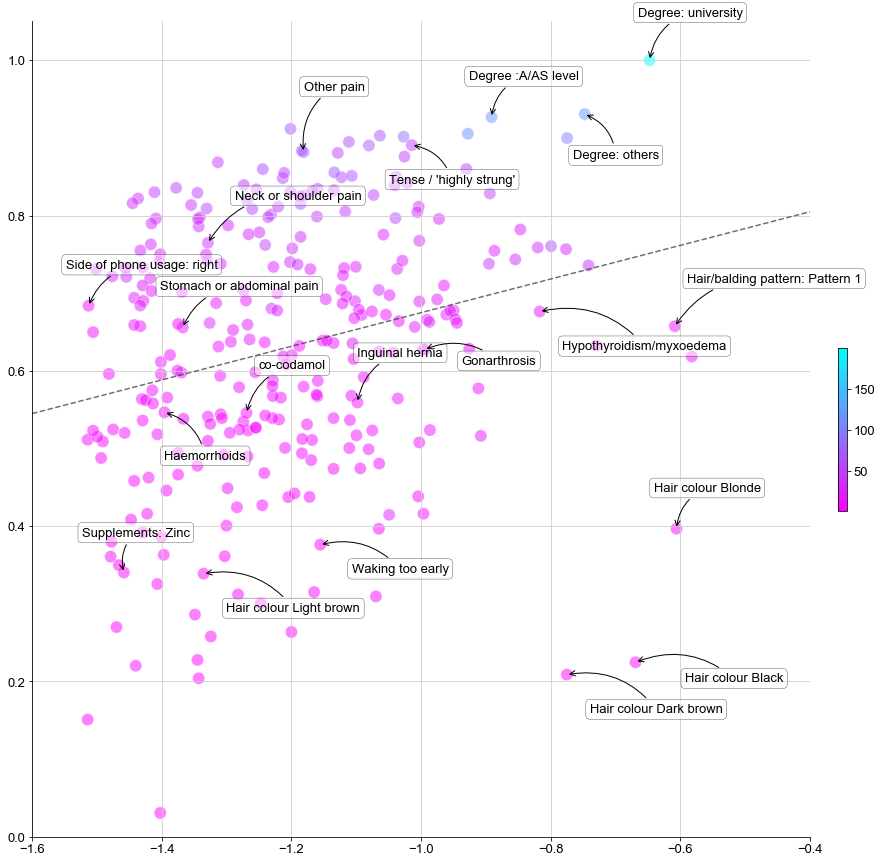

In [111]:
#phenotypes_par_filtered_description_dict=pd.read_csv(phenotypes_par_filtered_description_dict_path,sep='\t',index_col='description')
from numpy.polynomial.polynomial import polyfit

plt.rcParams["figure.figsize"] = (17,15)
plt.rcParams['font.size']=13


#h2bin_data_toplot=h2bin_data[np.logical_and.reduce([h2bin_data['h2_liability']==h2bin_data['h2_observed'],h2bin_data['h2_liability']>0.15,h2bin_data['h2_liability']<0.3])]
var_and_h2_filtered=var_and_h2[var_and_h2['uni.Total Liability scale h2']!=var_and_h2['uni.Total Observed scale h2']]

#var_and_h2_filtered=var_and_h2.copy()

var_and_h2_filtered['x_data']=np.log10(var_and_h2_filtered['uni.Total Liability scale h2'])
var_and_h2_filtered['y_data']=var_and_h2_filtered['bp8']
var_and_h2_filtered['hue_data']=-np.log10(var_and_h2_filtered['uni.Total h2 p'])
#np.log10(st.norm.sf(h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total[idx]['{}.Total Observed scale h2_se'.format(suffix)]))



points = plt.scatter(var_and_h2_filtered['x_data'],
                     var_and_h2_filtered['y_data'],
                     c=var_and_h2_filtered["hue_data"],
                     cmap="cool_r")
plt.clf()
plt.colorbar(points,orientation="vertical",pad=0.03,shrink=0.2)#,panchor=(-1,-1))

plot=sns.scatterplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],hue=var_and_h2_filtered['hue_data'],palette="cool_r",
                    legend=None,alpha=0.5,s=150
                    )
#sns.regplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],marker='')
x,y=var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data']
b, m = polyfit(x, y, 1)

#plt.plot(x, y, '.')
#plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '-',c=(0.2,0.2,0.2,0.7))
plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '--',c=(0.2,0.2,0.2,0.7))


dup_sort=lambda x: sorted(np.append(x,-x),key=lambda y: abs(y))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(0.06,0.08,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/4]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]


text_plotted=pd.DataFrame([])

var_and_h2_filtered['priority']=0
var_and_h2_filtered['priority']['23115_irnt']=1
var_and_h2_filtered['priority']['30100_irnt']=1
var_and_h2_filtered['priority']['30110_irnt']=1
var_and_h2_filtered['priority']['23104_irnt']=1
var_and_h2_filtered['priority']['30130_irnt']=1
var_and_h2_filtered['priority']['23104_irnt']=1
var_and_h2_filtered['priority']['5132_irnt']=1

for idx,row in var_and_h2_filtered.sort_values('y_data',ascending=False).sort_values('priority',ascending=False).iterrows():
    description_short=description_to_short(row['description'],'abbr_pub')
    if type(description_short)==float:
        continue
    #plt.text(row['x_data'], row['y_data'], description_to_short(row['description'],'abbr_pub'))#, horizontalalignment='left', size='medium', color='black',)
    s=description_short
    xy=np.array([row['x_data'], row['y_data']])
    #np.random.shuffle(move_sample)
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    
    for move in move_sample:
        xytext=xy+move
        #print(idx,xy)
        #(((text_dup[0]-row['h2_liability'])**2+(5*(text_dup[1]-row['cm8']))**2)<0.0007).sum()==0:
        if  row['priority']==1 or text_plotted.shape[0]==0 or ((((text_plotted['x']-xytext[0])**2+0.5*(text_plotted['y']-xytext[1])**2)<0.02).sum()==0 and xytext[1]<1):
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            #print(description_short,xy,move,xytext)
            break

            
plt.grid(color=(0.8,0.8,0.8,0.1))
#plt.grid()
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.xlim(-1.6,-0.4)
plt.ylim(0,1.05)

sns.despine()

plt.show()

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning

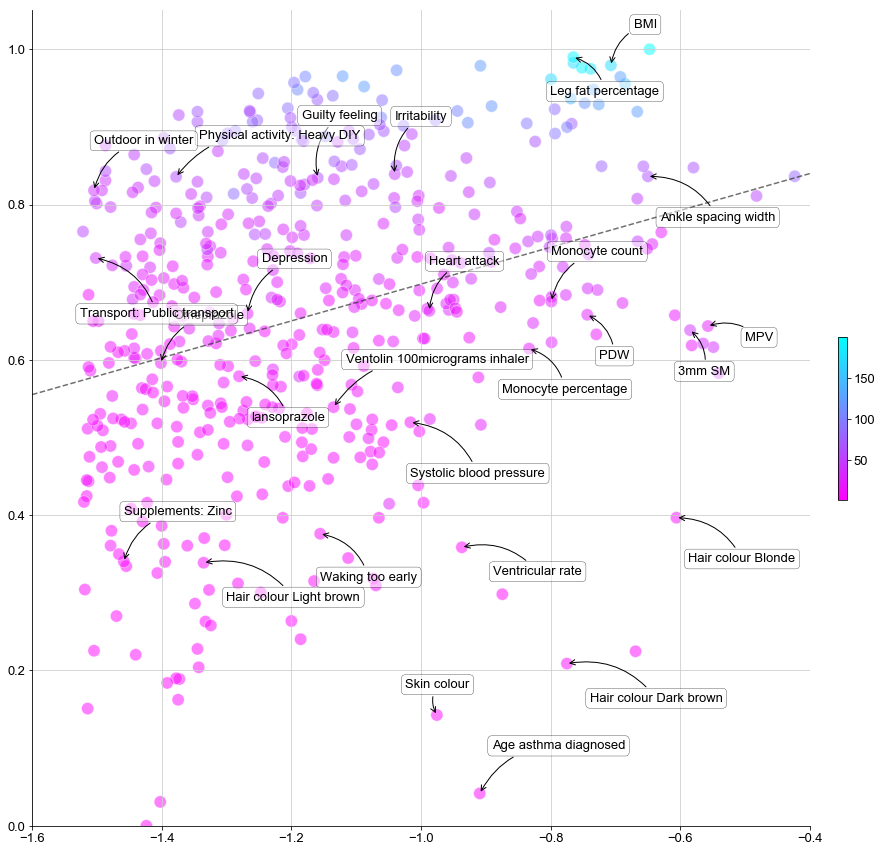

In [124]:
#phenotypes_par_filtered_description_dict=pd.read_csv(phenotypes_par_filtered_description_dict_path,sep='\t',index_col='description')
from numpy.polynomial.polynomial import polyfit

plt.rcParams["figure.figsize"] = (17,15)
plt.rcParams['font.size']=13


#h2bin_data_toplot=h2bin_data[np.logical_and.reduce([h2bin_data['h2_liability']==h2bin_data['h2_observed'],h2bin_data['h2_liability']>0.15,h2bin_data['h2_liability']<0.3])]
var_and_h2_filtered=var_and_h2#[var_and_h2['uni.Total Liability scale h2']==var_and_h2['uni.Total Observed scale h2']]

#var_and_h2_filtered=var_and_h2.copy()

var_and_h2_filtered['x_data']=np.log10(var_and_h2_filtered['uni.Total Liability scale h2'])
var_and_h2_filtered['y_data']=var_and_h2_filtered['bp8']
var_and_h2_filtered['hue_data']=-np.log10(var_and_h2_filtered['uni.Total h2 p'])
#np.log10(st.norm.sf(h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total[idx]['{}.Total Observed scale h2_se'.format(suffix)]))



points = plt.scatter(var_and_h2_filtered['x_data'],
                     var_and_h2_filtered['y_data'],
                     c=var_and_h2_filtered["hue_data"],
                     cmap="cool_r")
plt.clf()
plt.colorbar(points,orientation="vertical",pad=0.03,shrink=0.2)#,panchor=(-1,-1))

plot=sns.scatterplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],hue=var_and_h2_filtered['hue_data'],palette="cool_r",
                    legend=None,alpha=0.5,s=150
                    )
#sns.regplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],marker='')
x,y=var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data']
b, m = polyfit(x, y, 1)

#plt.plot(x, y, '.')
#plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '-',c=(0.2,0.2,0.2,0.7))
plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '--',c=(0.2,0.2,0.2,0.7))


dup_sort=lambda x: sorted(np.append(x,-x),key=lambda y: abs(y))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(0.06,0.08,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/4]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]


text_plotted=pd.DataFrame([])

var_and_h2_filtered['priority']=0
#var_and_h2_filtered['priority']['23115_irnt']=1
var_and_h2_filtered['priority']['30100_irnt']=1
var_and_h2_filtered['priority']['30110_irnt']=1
var_and_h2_filtered['priority']['23104_irnt']=1
var_and_h2_filtered['priority']['30130_irnt']=1
var_and_h2_filtered['priority']['23104_irnt']=1
var_and_h2_filtered['priority']['5132_irnt']=1

for idx,row in var_and_h2_filtered.sort_values('y_data',ascending=False).sort_values('priority',ascending=False).iterrows():
    description_short=description_to_short(row['description'],'abbr_pub')
    if type(description_short)==float:
        continue
    #plt.text(row['x_data'], row['y_data'], description_to_short(row['description'],'abbr_pub'))#, horizontalalignment='left', size='medium', color='black',)
    s=description_short
    xy=np.array([row['x_data'], row['y_data']])
    #np.random.shuffle(move_sample)
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    
    for move in move_sample:
        xytext=xy+move
        #print(idx,xy)
        #(((text_dup[0]-row['h2_liability'])**2+(5*(text_dup[1]-row['cm8']))**2)<0.0007).sum()==0:
        if  row['priority']==1 or text_plotted.shape[0]==0 or ((((text_plotted['x']-xytext[0])**2+0.5*(text_plotted['y']-xytext[1])**2)<0.02).sum()==0 and xytext[1]<1):
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            #print(description_short,xy,move,xytext)
            break

            
plt.grid(color=(0.8,0.8,0.8,0.1))
#plt.grid()
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.xlim(-1.6,-0.4)
plt.ylim(0,1.05)

sns.despine()

plt.show()